In [1]:
Names = "Scott Duncan", "Aiden Wells"


In [167]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
acc = pd.read_csv('~/Final Project/ACC_AUX.CSV')
pop = pd.read_csv('~/Final Project/acs2015_county_data.csv')


In [169]:
data = acc.dropna().drop(["YEAR","ST_CASE","COUNTY","A_CRAINJ",
                          "A_REGION","A_RU","A_INTER","A_RELRD",
                          "A_INTSEC","A_ROADFC","A_JUNC","A_MANCOL",
                          "A_TOD","A_DOW","A_CT","A_LT","A_MC","A_PED",
                          "A_PED_F","A_PEDAL","A_PEDAL_F","A_ROLL",
                          "A_D15_19","A_D16_19","A_D15_20","A_D16_20",
                          "A_D65PLS","A_D21_24","A_D16_24","A_RD"], axis=1)

data.columns = ['State','Fatality','Involved Speeding','Police Pursuit',
                'Positive BAC', 'Hit and Run','Distracted Driving',
                'Drowsy Driving']

fips = { 1: 'Alabama',
        2: 'Alaska',
        4: 'Arizona',
        5: 'Arkansas',
        6: 'California',
        8: 'Colorado',
        9: 'Connecticut',
        10: 'Delaware',
        11: 'District of Columbia',
        12: 'Florida',
        13: 'Georgia',
        15: 'Hawaii',
        16: 'Idaho',
        17: 'Illinois',
        18: 'Indiana',
        19: 'Iowa',
        20: 'Kansas',
        21: 'Kentucky',
        22: 'Louisiana',
        23: 'Maine',
        24: 'Maryland',
        25: 'Massachusetts',
        26: 'Michigan',
        27: 'Minnesota',
        28: 'Mississippi',
        29: 'Missouri',
        30: 'Montana',
        31: 'Nebraska',
        32: 'Nevada',
        33: 'New Hampshire',
        34: 'New Jersey',
        35: 'New Mexico',
        36: 'New York',
        37: 'North Carolina',
        38: 'North Dakota',
        39: 'Ohio',
        40: 'Oklahoma',
        41: 'Oregon',
        42: 'Pennsylvania',
        44:'Rhode Island',
        45: 'South Carolina',
        46: 'South Dakota',
        47: 'Tennessee',
        48: 'Texas',
        49: 'Utah',
        50: 'Vermont',
        51: 'Virginia',
        53: 'Washington',
        54: 'West Virginia',
        55: 'Wisconsin',
        56: 'Wyoming'}

fips = pd.Series(fips)
data['State'] = data['State'].astype(str)




for i in range(57):
    if i in fips.index:
        data['State'] = data['State'].replace(str(i), fips[i])
    

data

,State,Fatality,Involved Speeding,Police Pursuit,Positive BAC,Hit and Run,Distracted Driving,Drowsy Driving
0,Alabama,1,2,2,1,2,2,2
1,Alabama,1,1,2,2,2,2,2
2,Alabama,1,2,2,1,2,2,2
3,Alabama,1,2,2,1,2,2,2
4,Alabama,1,2,2,2,2,2,2
5,Alabama,1,2,2,3,2,2,2
6,Alabama,1,2,2,3,2,2,2
7,Alabama,1,2,2,3,1,2,2
8,Alabama,1,2,2,3,2,2,2
9,Alabama,1,2,2,3,2,2,2


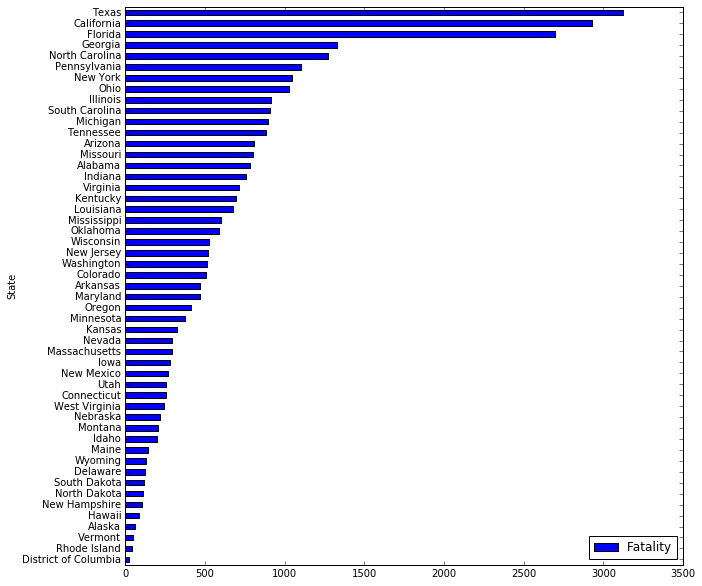

In [170]:
Fatality = pd.DataFrame(data.iloc[:, [0,1]])
Fatality = Fatality.groupby(['State']).count()

Fatality.sort_values(by=['Fatality']).plot.barh(figsize=(10,10))

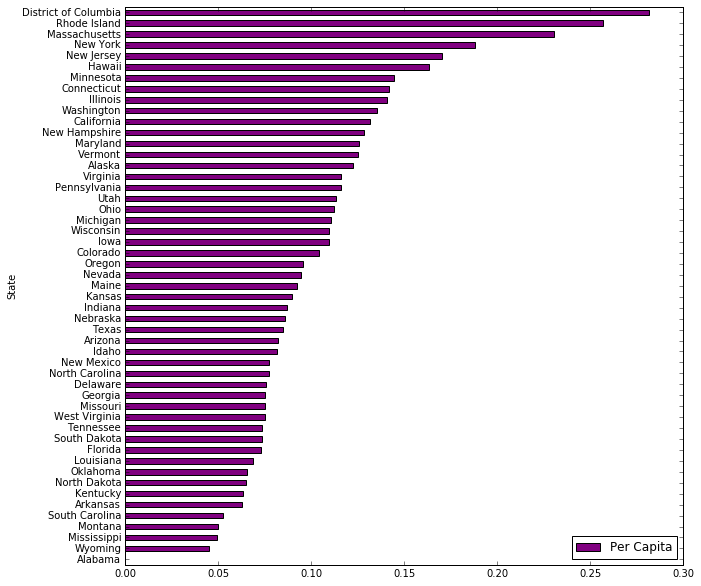

In [204]:
pop2 = pd.DataFrame(pop.iloc[:, [1,3]])

pop2 = pop2.groupby(['State']).sum()

pop3 = pop2.drop("Puerto Rico")

pop3

pc = pd.Series(pop3.size)

for i in range(pop3.size):
    pc[i] = (pop3['TotalPop'][i]/100000)/Fatality['Fatality'][i]


Fatality["Per Capita"] = pc.values


PerCapita = Fatality.drop("Fatality", axis = 1)

PerCapita.sort_values(by=['Per Capita']).plot.barh(figsize=(10,10), color='purple')


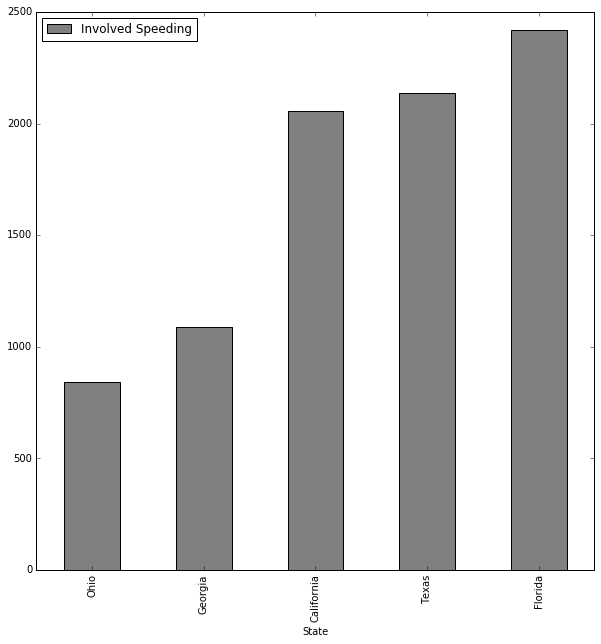

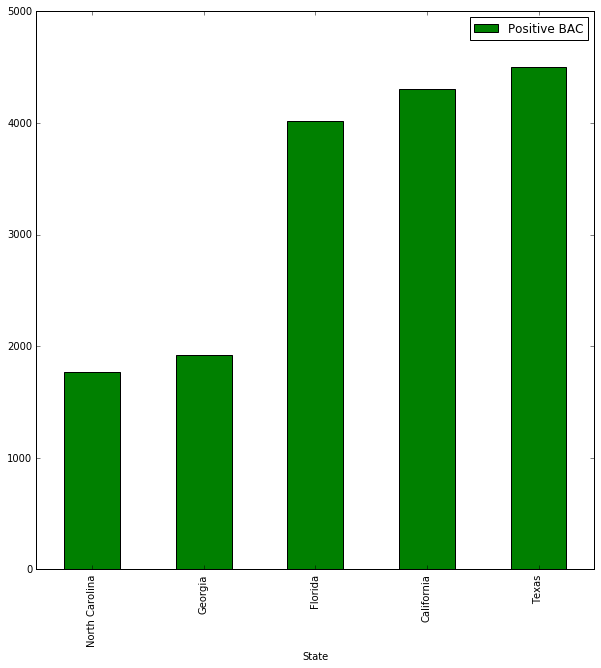

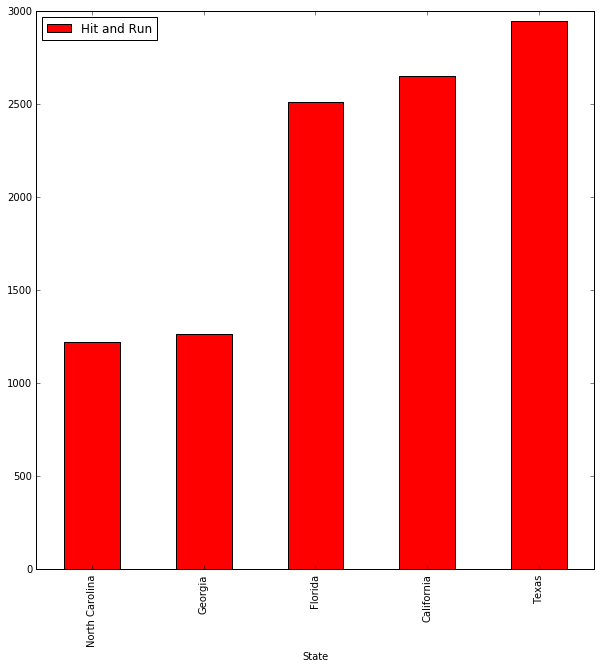

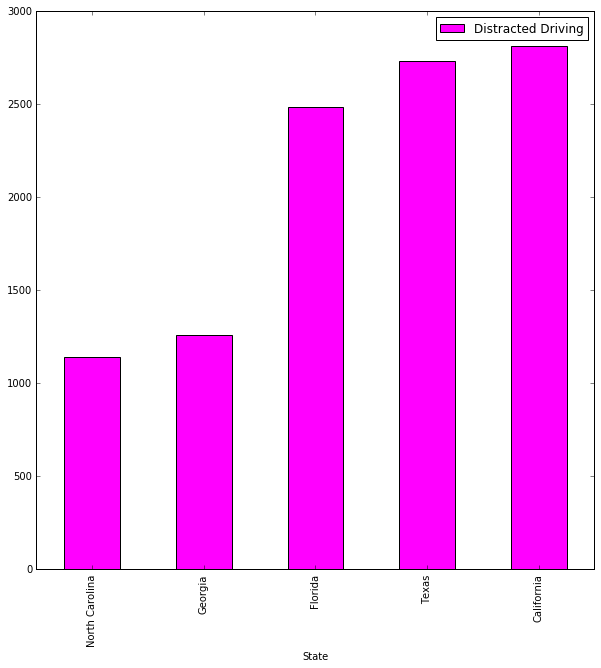

In [252]:
#PerCapita.sort_values(by=['Per Capita']).plot.barh(figsize=(10,10), color='purple')

df = pd.DataFrame(data.iloc[:, [0,2,4,5,6]])

df = df.replace({'Involved Speeding': 1, 'Positive BAC': 1,'Hit and Run': 1,'Distracted Driving': 1}, 0)
df = df.replace({'Involved Speeding': 2, 'Positive BAC': 2,'Hit and Run': 2,'Distracted Driving': 2}, 1)
df = df.replace({'Positive BAC': 3}, 2)

df = df.groupby(['State']).sum()


sp = pd.DataFrame(df.iloc[:, [0]])
sp = sp.nlargest(5, 'Involved Speeding')

bac = pd.DataFrame(df.iloc[:, [1]])
bac = bac.nlargest(5, 'Positive BAC')

hr = pd.DataFrame(df.iloc[:, [2]])
hr = hr.nlargest(5, 'Hit and Run')

dd = pd.DataFrame(df.iloc[:, [3]])
dd = dd.nlargest(5, 'Distracted Driving')


sp.sort_values(by=['Involved Speeding']).plot.bar(figsize=(10,10), color='gray')
bac.sort_values(by=['Positive BAC']).plot.bar(figsize=(10,10), color='green')
hr.sort_values(by=['Hit and Run']).plot.bar(figsize=(10,10), color='red')
dd.sort_values(by=['Distracted Driving']).plot.bar(figsize=(10,10), color='magenta')
